#### packages


In [1]:
#empty

In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=4d75a2c0e796b4f628cf8ba1072bab644f149970343662d6913e7e4e693219f8
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
#automatic imports required packages as per usage in code
import pyforest

In [4]:
#packages
!pip install tensorflow-probability
!pip install nbconvert

In [5]:
import pandas as pd
import numpy as np

### DATA

#### import data

In [6]:

#using official url to load data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

data = pd.read_csv(url)

data.head()

UDI Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
0    1     M14860    M                298.1  ...    0    0    0    0
1    2     L47181    L                298.2  ...    0    0    0    0
2    3     L47182    L                298.1  ...    0    0    0    0
3    4     L47183    L                298.2  ...    0    0    0    0
4    5     L47184    L                298.2  ...    0    0    0    0

[5 rows x 14 columns]

#### data description 
taken from UCI:

Abstract: The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

| Variable | Value |
| --- | --- |
|Data Set Characteristics:|  Multivariate, Time-Series|
|Number of Instances:|10000|
|Area:| Computer|
|Attribute Characteristics:|Real|
|Number of Attributes:|14|
|Date Donated:| 2020-08-30|
|Associated Tasks:| Classification, Regression, Causal-Discovery|
|Missing Values?| N/A|
|Number of Web Hits:|33135|

** Data Set Information: **

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.



**Attribute Information:**

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail


**Relevant Papers:**

Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

In [7]:
data.describe()

UDI  Air temperature [K]  ...           OSF          RNF
count  10000.00000         10000.000000  ...  10000.000000  10000.00000
mean    5000.50000           300.004930  ...      0.009800      0.00190
std     2886.89568             2.000259  ...      0.098514      0.04355
min        1.00000           295.300000  ...      0.000000      0.00000
25%     2500.75000           298.300000  ...      0.000000      0.00000
50%     5000.50000           300.100000  ...      0.000000      0.00000
75%     7500.25000           301.500000  ...      0.000000      0.00000
max    10000.00000           304.500000  ...      1.000000      1.00000

[8 rows x 12 columns]

In [8]:
#for i in data:
    #print(data[i].unique())

In [9]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [10]:
#basic info about dataset
df = data
df.shape
df.index
df.columns
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [11]:
df.sum()
df.cumsum()
df.min()
df.max()
df.describe()
df.mean()
df.median()

UDI                        5000.5
Air temperature [K]         300.1
Process temperature [K]     310.1
Rotational speed [rpm]     1503.0
Torque [Nm]                  40.1
Tool wear [min]             108.0
Machine failure               0.0
TWF                           0.0
HDF                           0.0
PWF                           0.0
OSF                           0.0
RNF                           0.0
dtype: float64

#### preprocessing data

In [12]:
#define X and y from df
# product id is unique for each data row and its not important
# but we have product type of 3 categories
# L, M, H are three types representing for low (50% of all products),
# medium (30%) and high (20%) as product quality variants respectively
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [13]:
# converting this categorical data to numerical with class 0, 1, 2 for L,M,H respectively
# using OrdinalEncoder from sklearn for ordinal data of product quality variant 
# indicating l for low quality, m for medium quality, h for high quality
# one-hot encoding is not suitable for ordinal data
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Type'] = ordinal_encoder.fit_transform(df[['Type']])
df['Type'].unique()
# this gives categories converted into integers

array([2., 1., 0.])

In [14]:
# these are original categories in data
ordinal_encoder.categories_

[array(['H', 'L', 'M'], dtype=object)]

In [15]:
# this sorts all the categories present and assigns values to them in alphabetical order
# 0 for H
# 1 for L
# 2 for M
print(ordinal_encoder.inverse_transform([[0]]))
print(ordinal_encoder.inverse_transform([[1]]))
print(ordinal_encoder.inverse_transform([[2]]))

[['H']]
[['L']]
[['M']]


In [16]:
df.describe()

UDI         Type  ...           OSF          RNF
count  10000.00000  10000.00000  ...  10000.000000  10000.00000
mean    5000.50000      1.19940  ...      0.009800      0.00190
std     2886.89568      0.60023  ...      0.098514      0.04355
min        1.00000      0.00000  ...      0.000000      0.00000
25%     2500.75000      1.00000  ...      0.000000      0.00000
50%     5000.50000      1.00000  ...      0.000000      0.00000
75%     7500.25000      2.00000  ...      0.000000      0.00000
max    10000.00000      2.00000  ...      1.000000      1.00000

[8 rows x 13 columns]

In [17]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  float64
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(9)

In [19]:
# now make the final dataset to be used in NN
# remove the product id variable
# remaining attributes are of types either int64 or float64
df.drop('Product ID', axis=1, inplace=True)
df.drop('UDI', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [21]:
## add mitosheet data visualization

#### mitosheet visualization code


In [22]:
# exploring data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

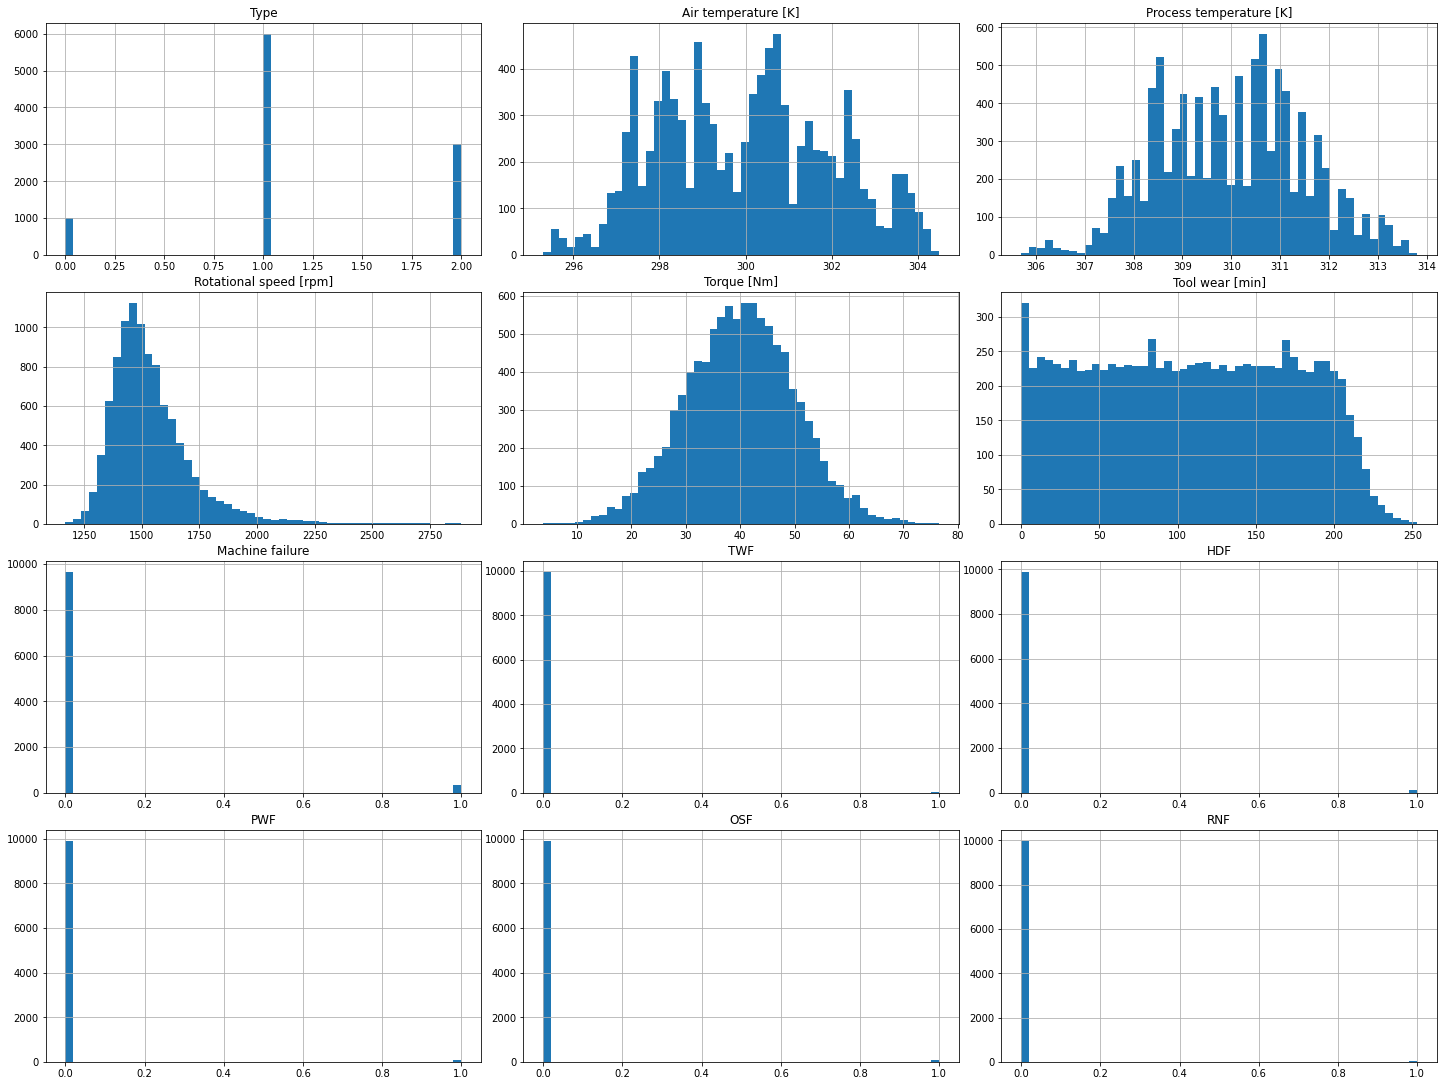

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<IPython.core.display.Javascript object>

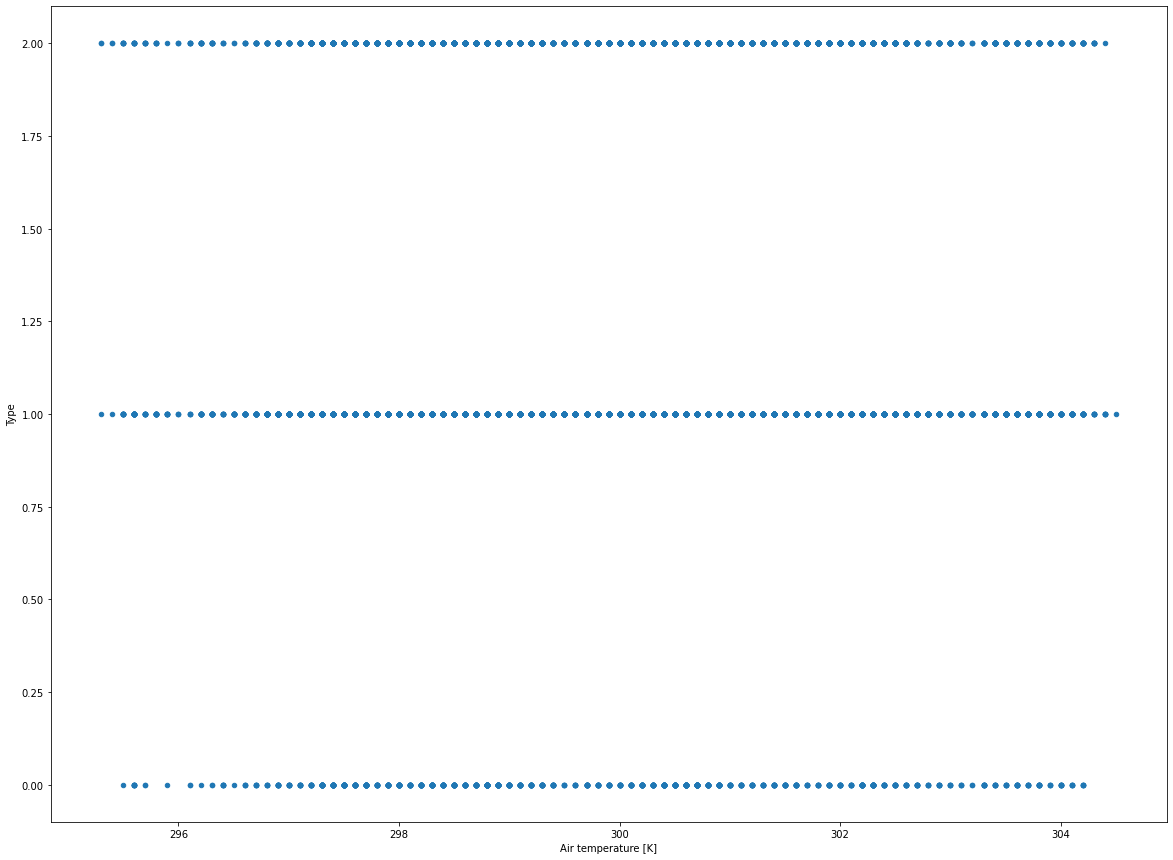

In [24]:
df.plot.scatter(y = 'Type',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

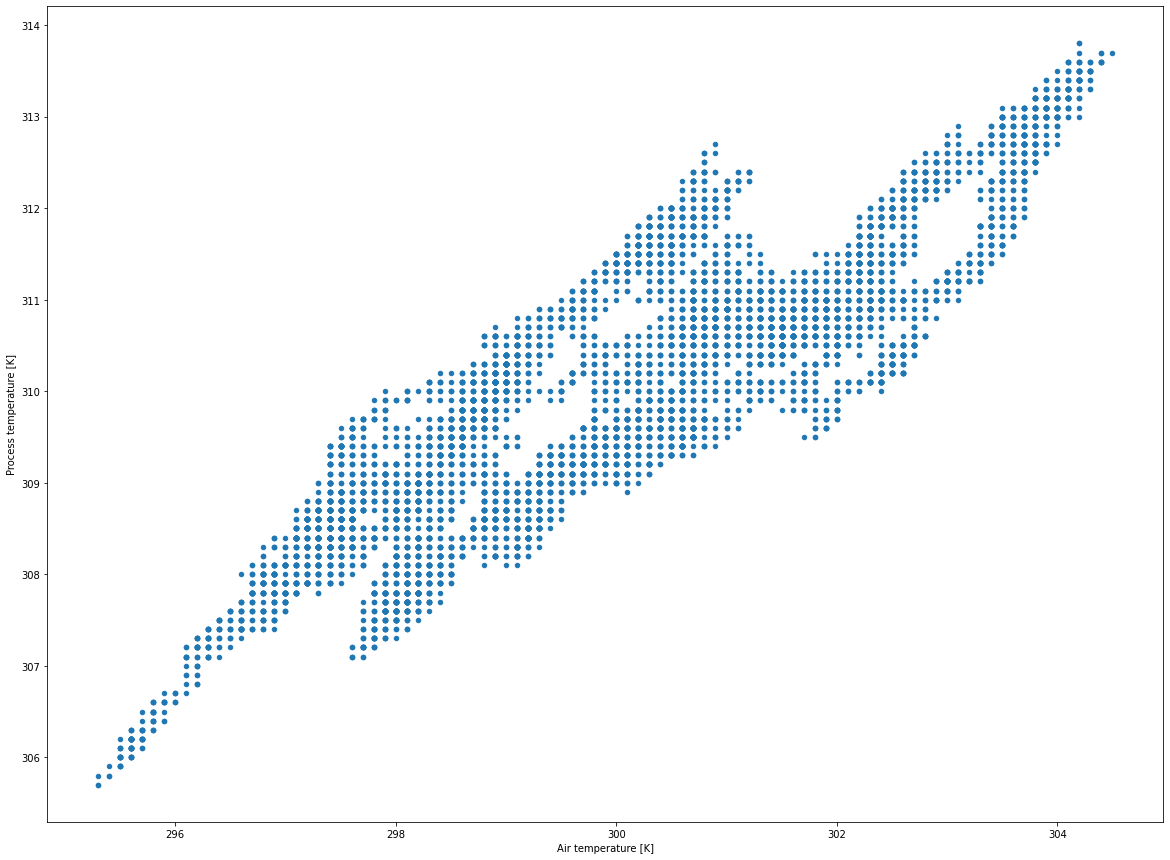

In [25]:
df.plot.scatter(y = 'Process temperature [K]',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

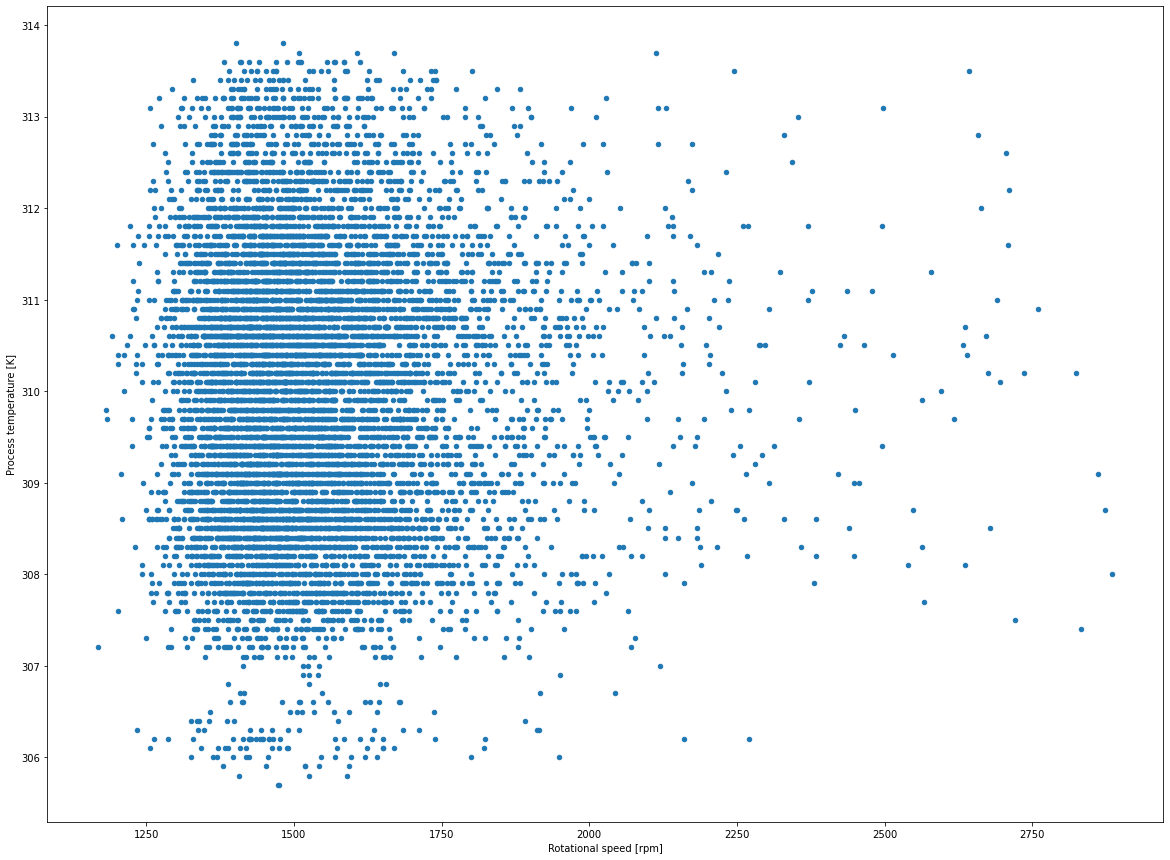

In [26]:
df.plot.scatter(y = 'Process temperature [K]',x='Rotational speed [rpm]', figsize=(20,15))
plt.show()

In [27]:
#confusion matrix

                             Type  ...  Machine failure
Type                     1.000000  ...        -0.005152
Air temperature [K]      0.017599  ...         0.082556
Process temperature [K]  0.013444  ...         0.035946
Rotational speed [rpm]  -0.002693  ...        -0.044188
Torque [Nm]              0.004011  ...         0.191321
Tool wear [min]         -0.003930  ...         0.105448
TWF                     -0.005349  ...         0.362904
HDF                      0.000108  ...         0.575800
PWF                      0.012121  ...         0.522812
OSF                     -0.021211  ...         0.531083
RNF                     -0.022147  ...         0.004516
Machine failure         -0.005152  ...         1.000000

[12 rows x 12 columns]


<IPython.core.display.Javascript object>

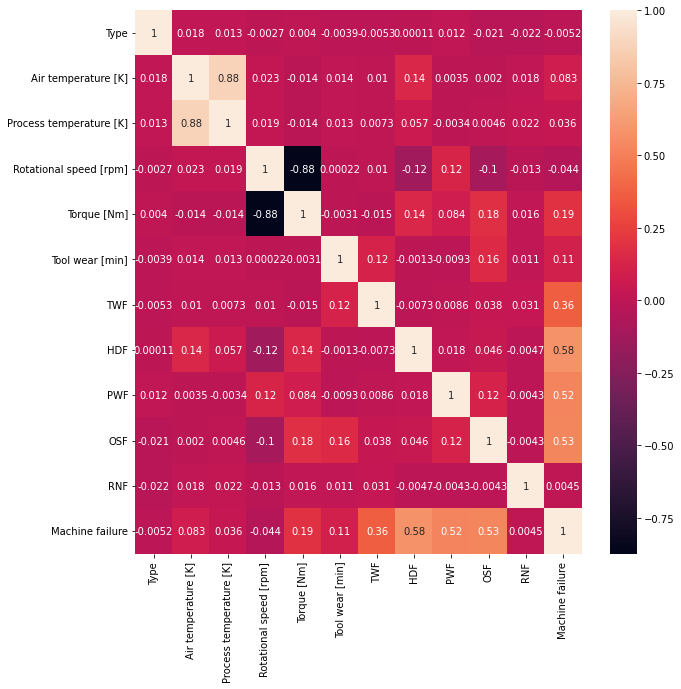

In [28]:
import seaborn as sns

#correlation matrix
numeric_col = ['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True,ax=ax)


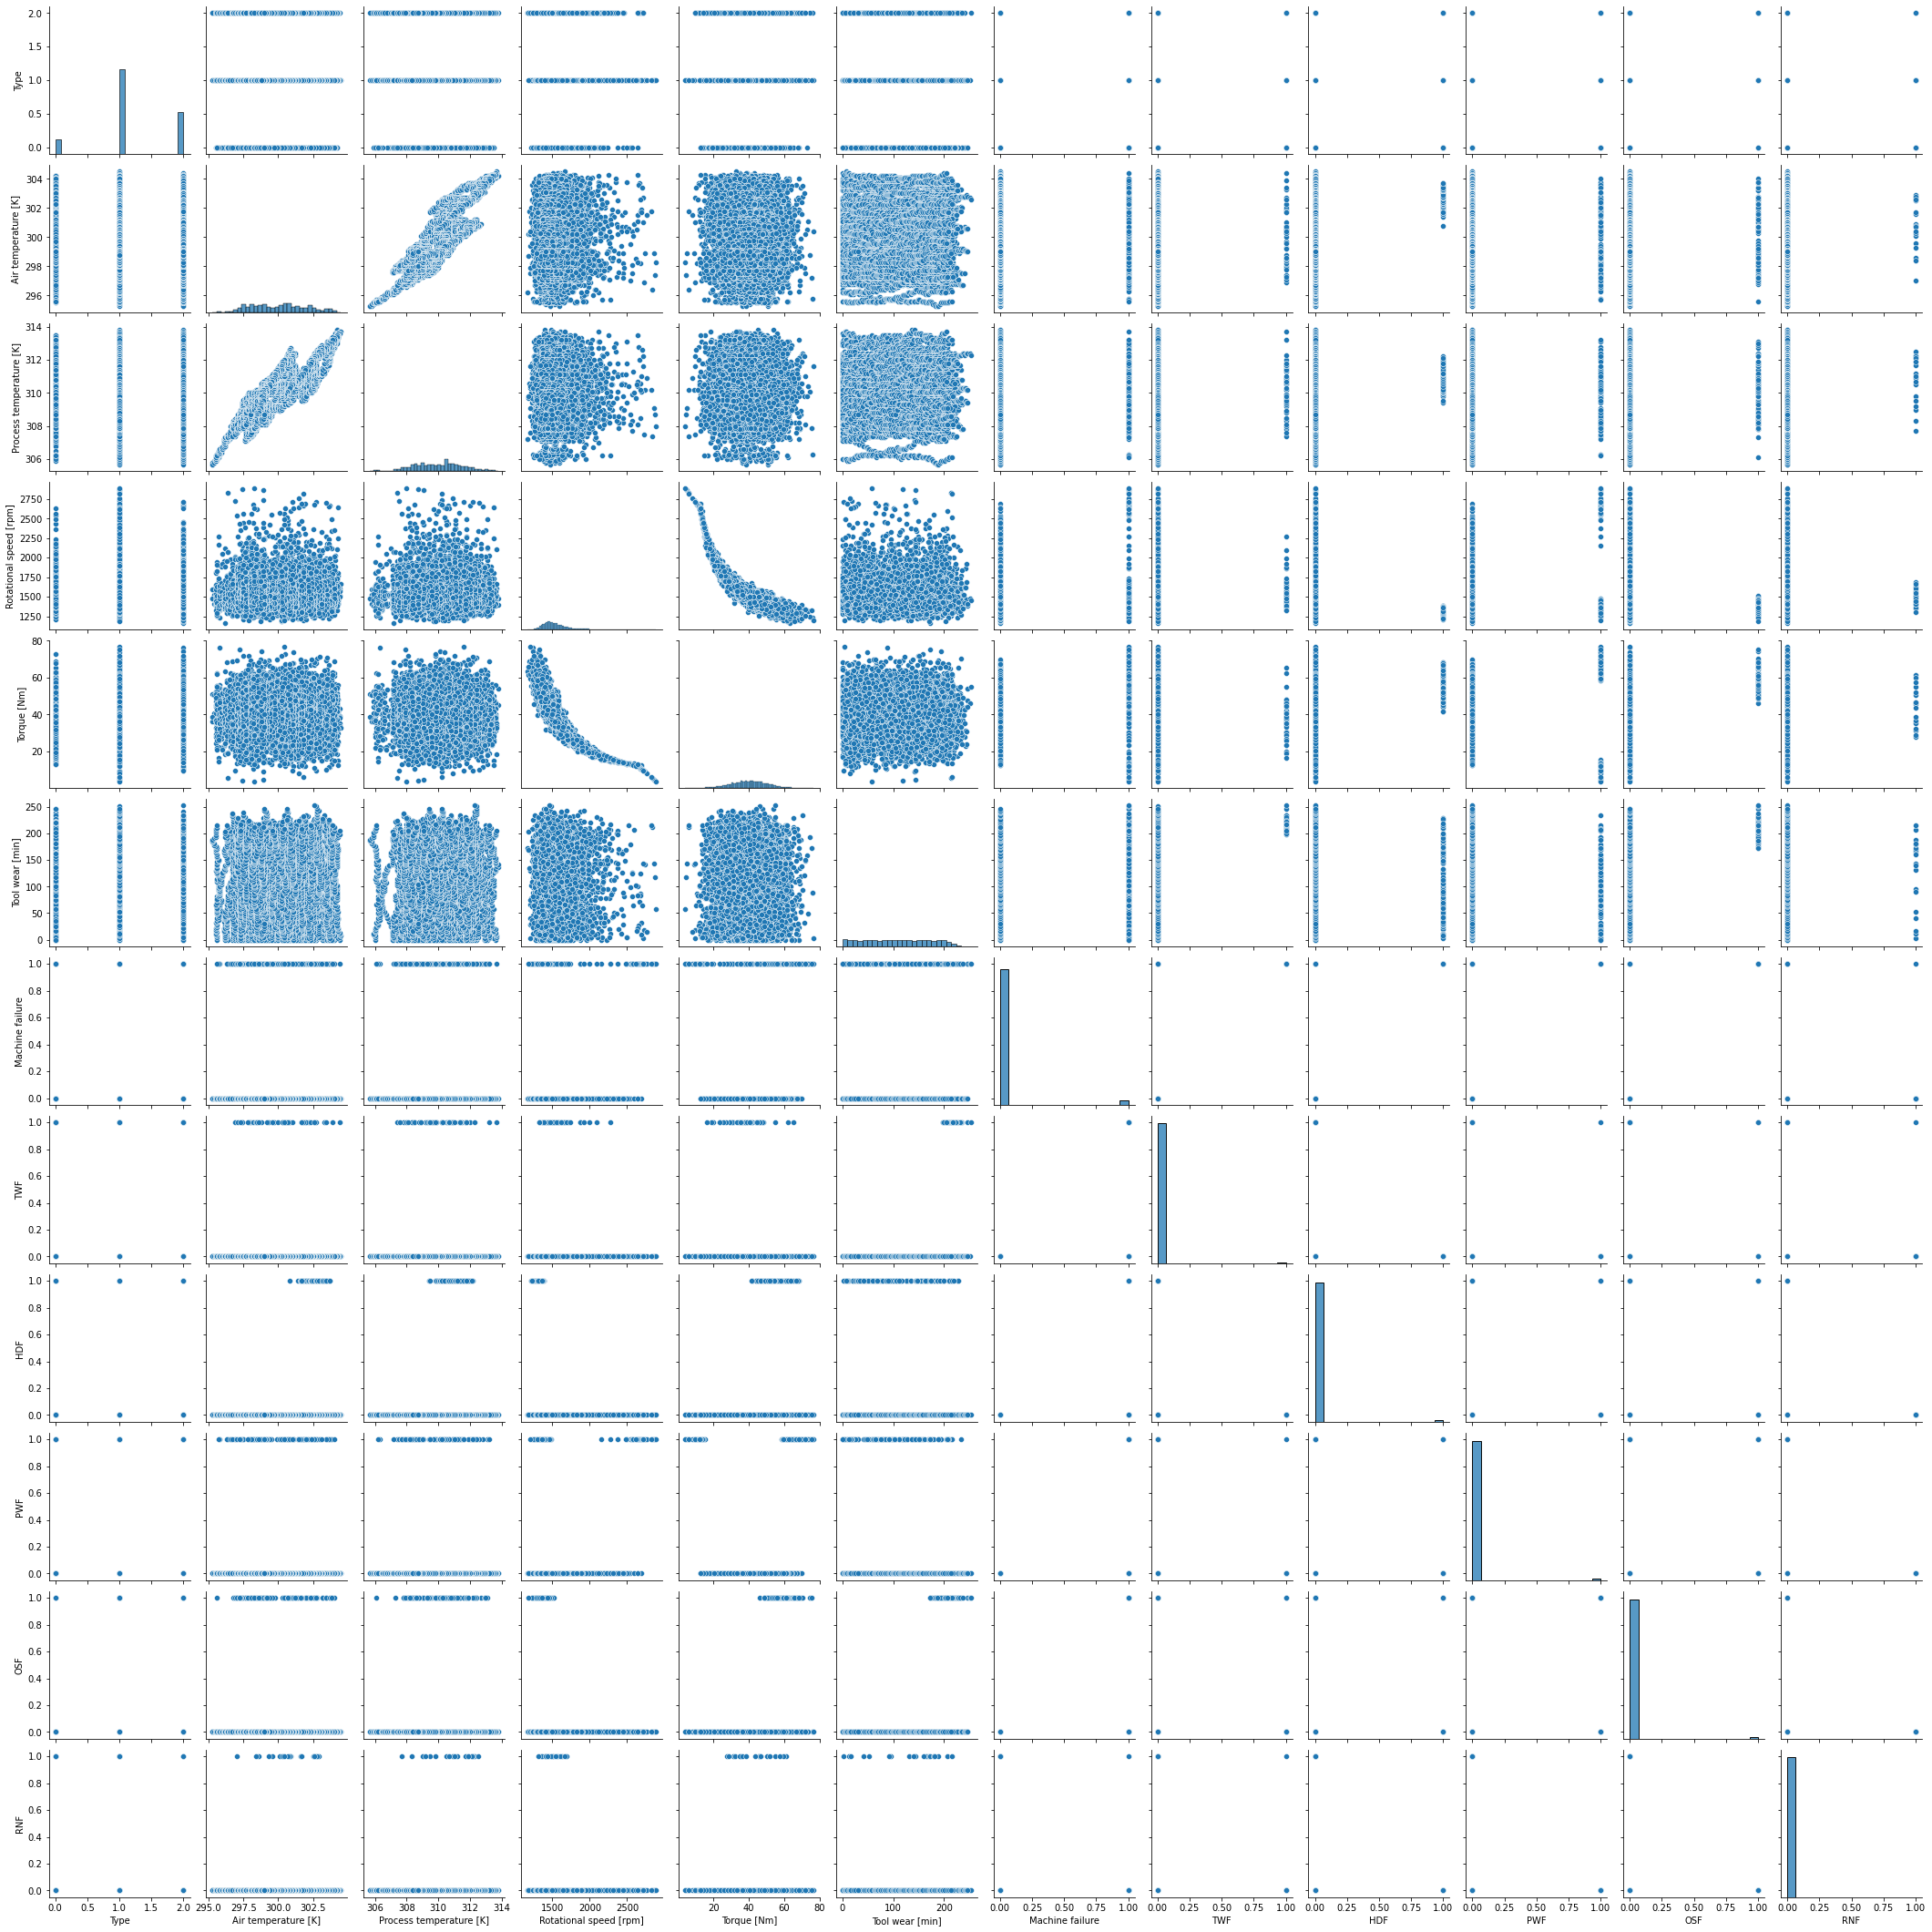

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind="scatter")
plt.show()

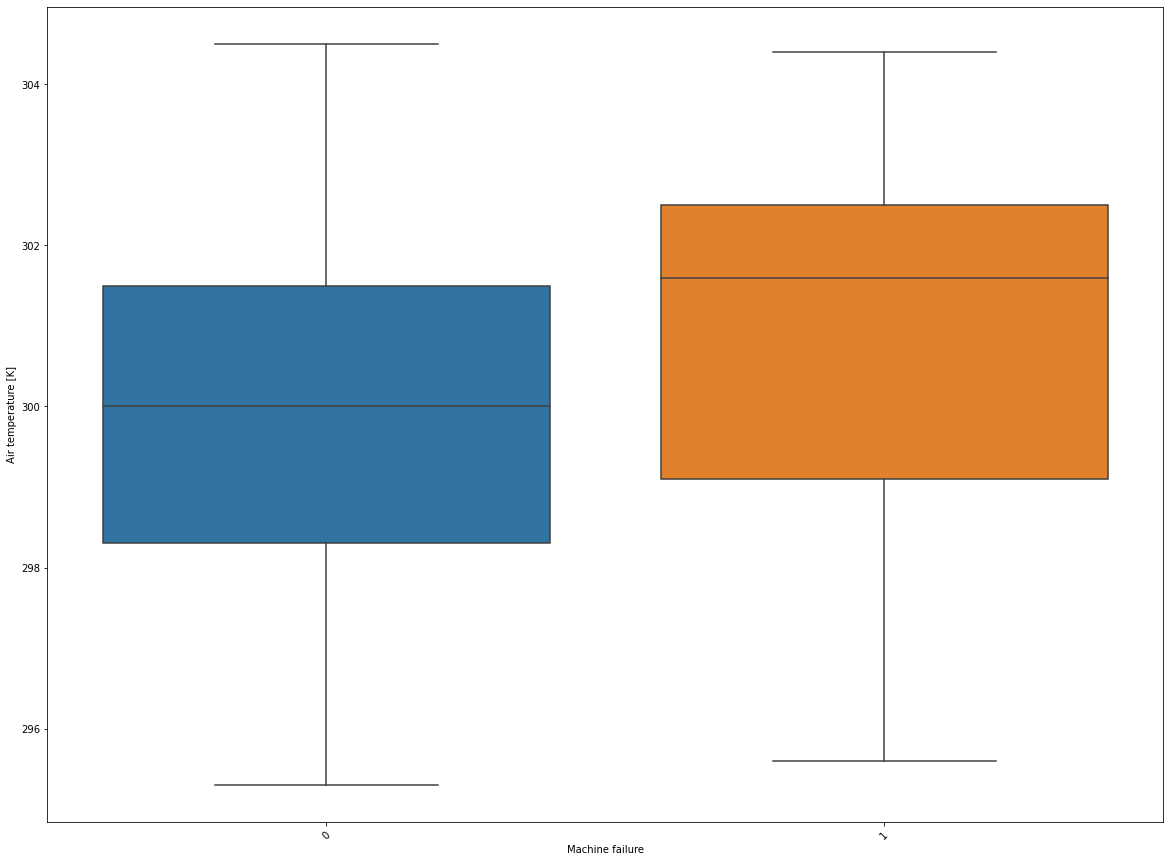

In [30]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Air temperature [K]', x = 'Machine failure');

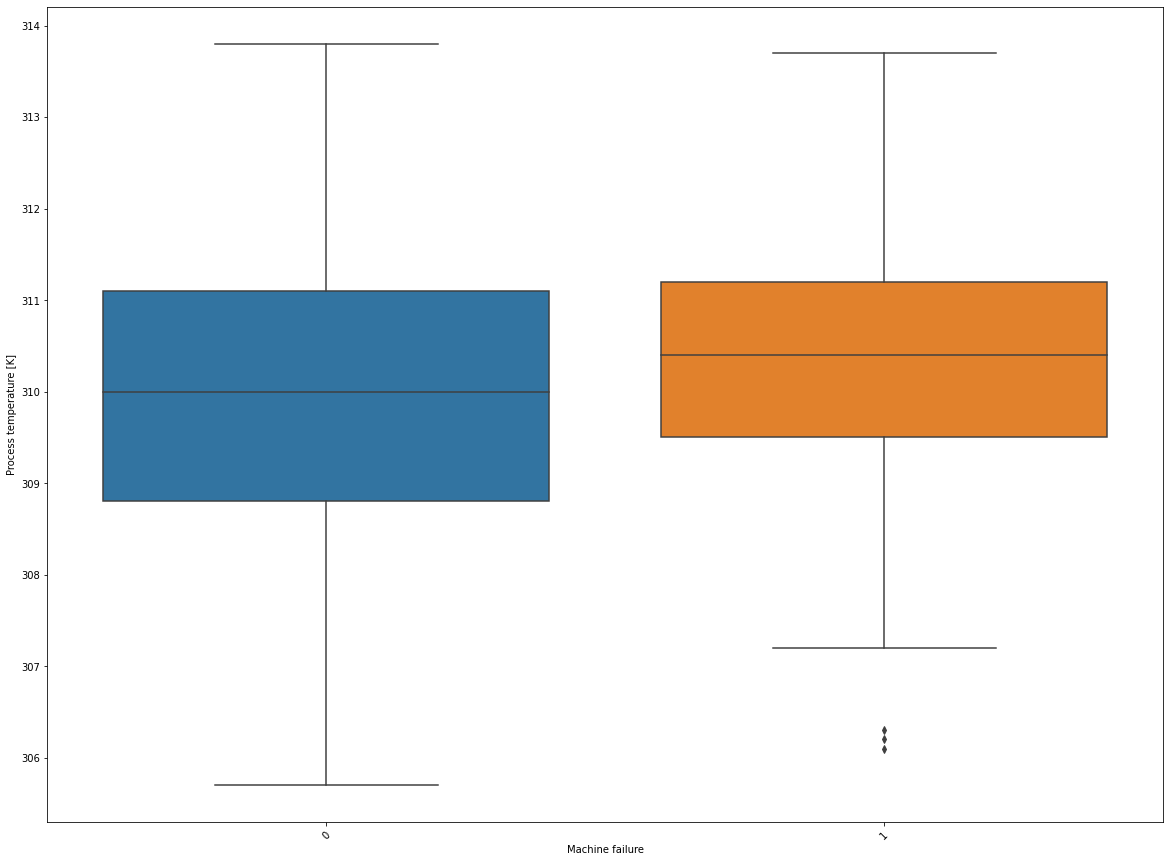

In [31]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Process temperature [K]', x = 'Machine failure');

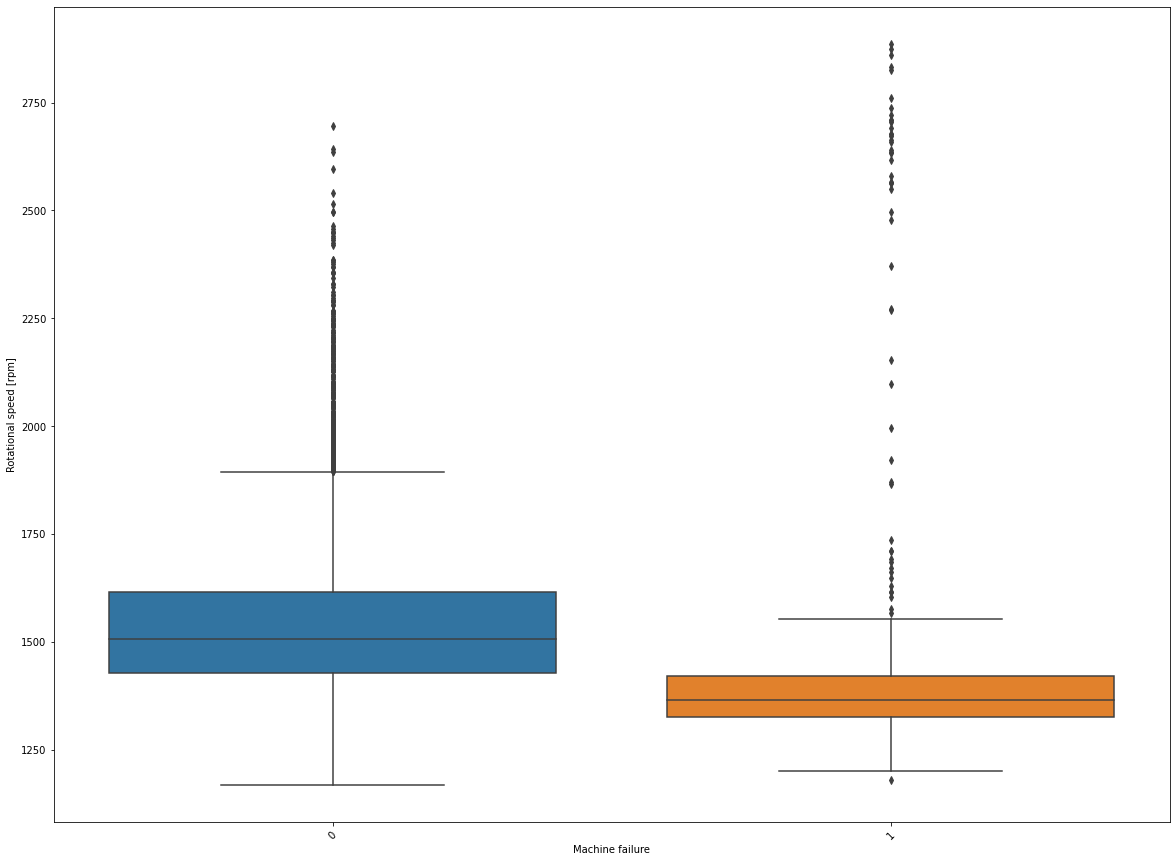

In [32]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Rotational speed [rpm]', x = 'Machine failure');

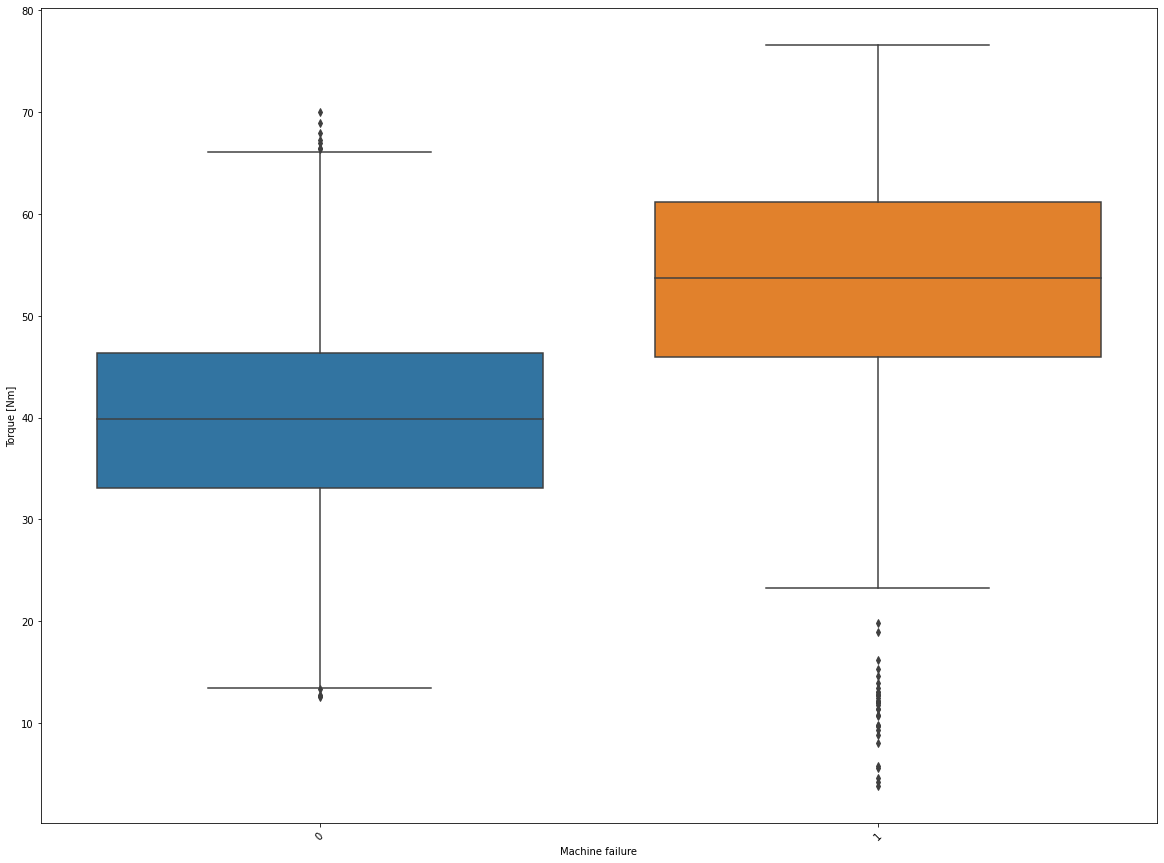

In [33]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Torque [Nm]', x = 'Machine failure');

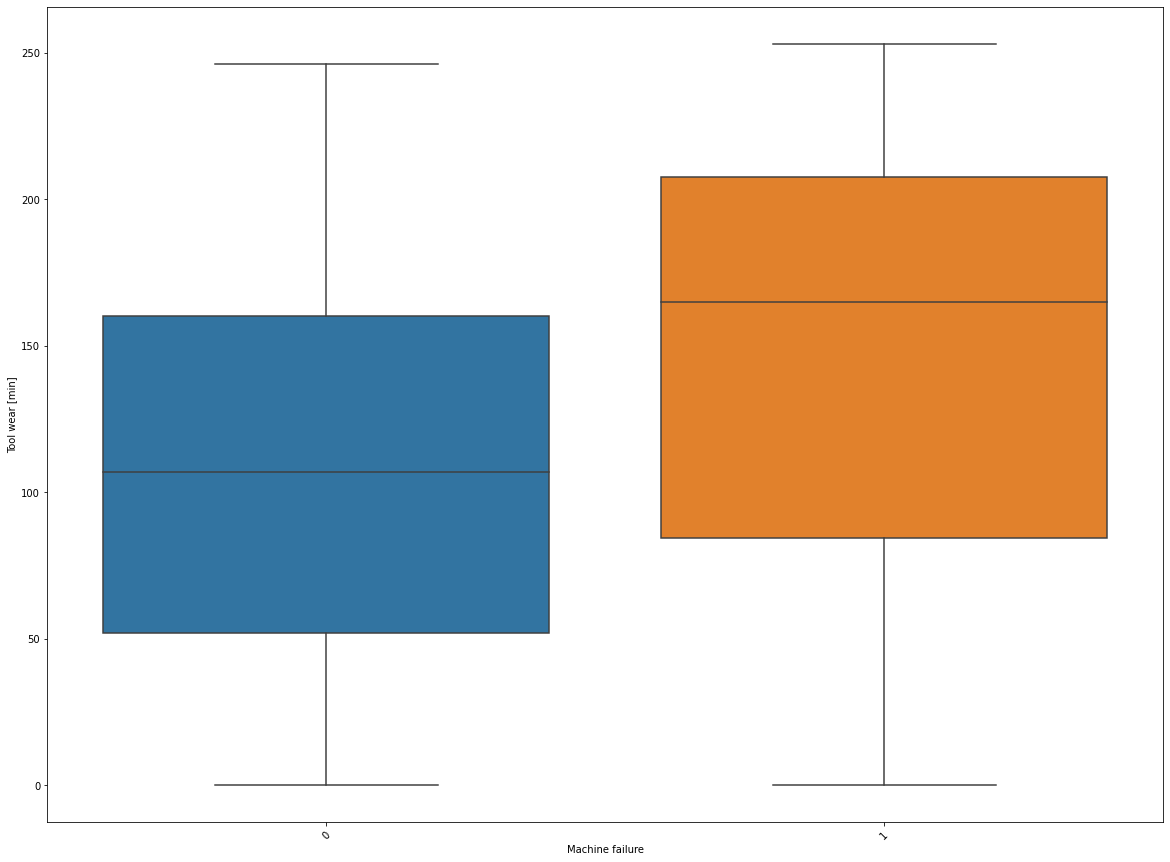

In [34]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Tool wear [min]', x = 'Machine failure');

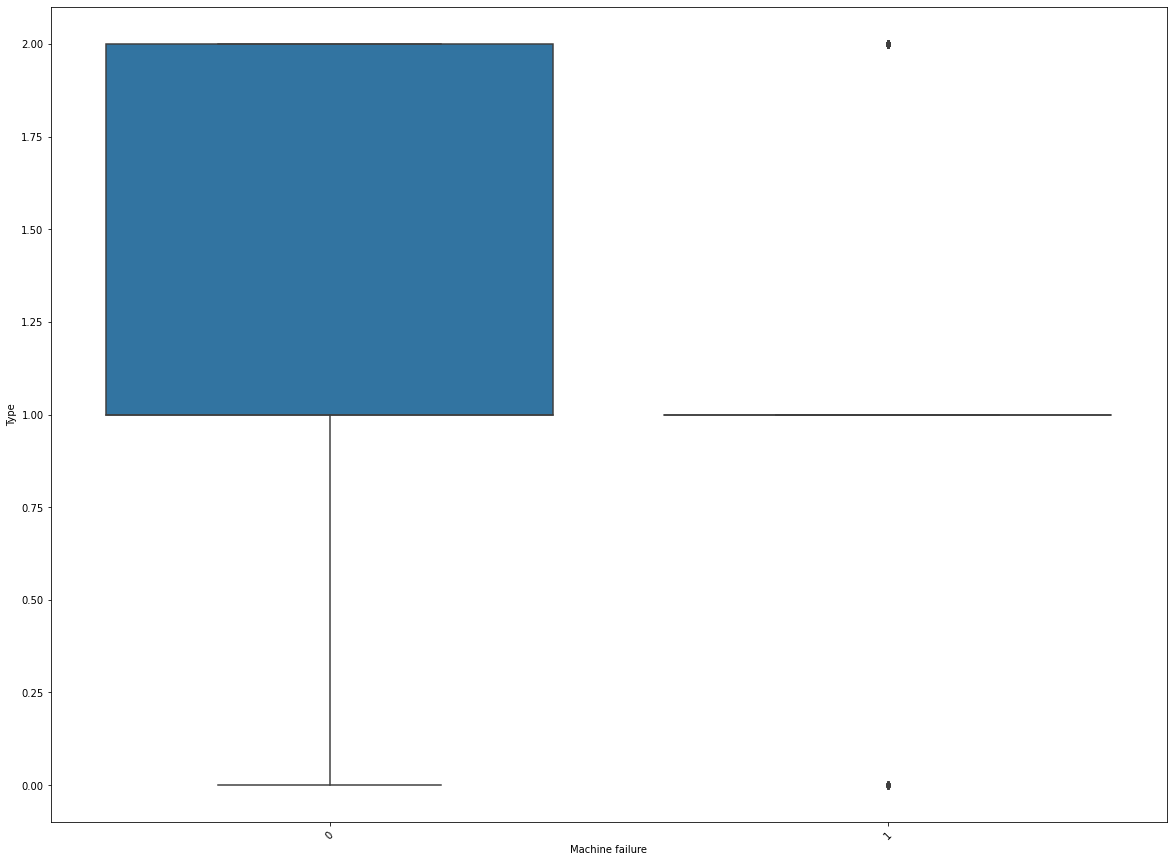

In [35]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Type', x = 'Machine failure');

### BNN

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

visualizing data

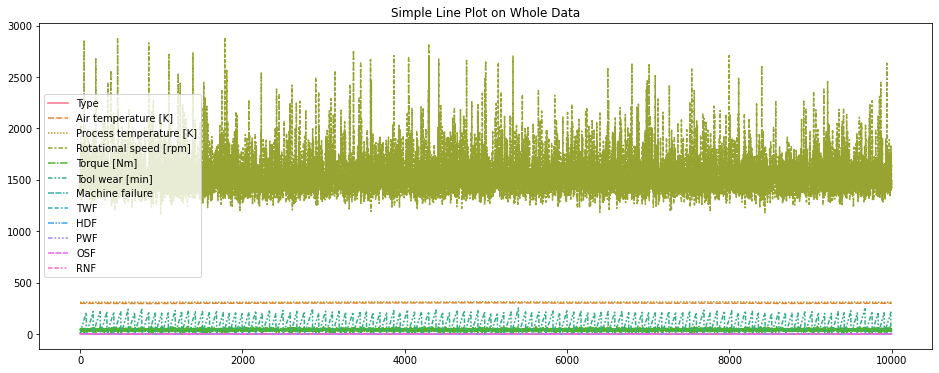

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,6))
plt.title("Simple Line Plot on Whole Data")
sns.lineplot(data=df)


Text(0.5, 1.0, 'Heatmap for Predictive Maintainence')

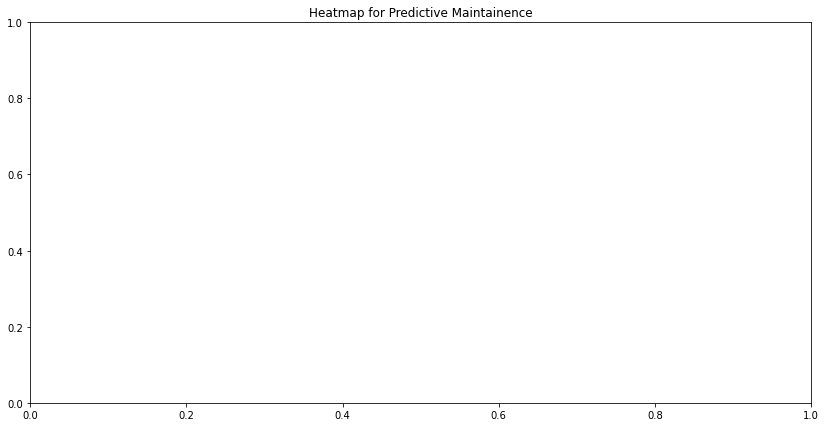

In [38]:
#heatmaps on whole data
plt.figure(figsize=(14,7))
# Add title
plt.title("Heatmap for Predictive Maintainence")
# Heatmap
#sns.heatmap(data=df['Machine failure'], annot=True)
# Add label for horizontal axis
#plt.xlabel("Axis")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


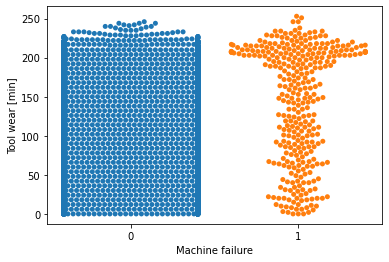

In [39]:
sns.swarmplot(x=df['Machine failure'],y=df['Tool wear [min]'])

In [40]:
#stripplot

Text(0.5, 1.0, 'KDE Distribution')

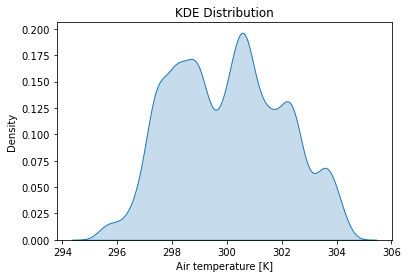

In [41]:
#distribution
#for i in df:
sns.kdeplot(data=df['Air temperature [K]'], label='Air temperature [K]', shade=True)

plt.title('KDE Distribution')

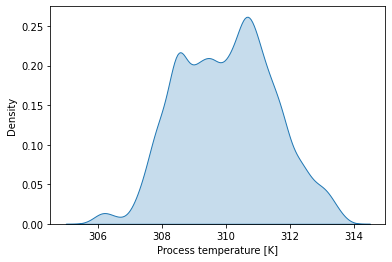

In [42]:
sns.kdeplot(data=df['Process temperature [K]'], label='Process temperature [K]', shade=True)


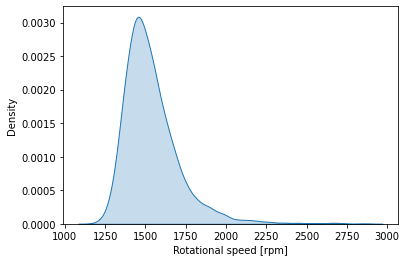

In [43]:
sns.kdeplot(data=df['Rotational speed [rpm]'], label='Rotational speed [rpm]', shade=True)


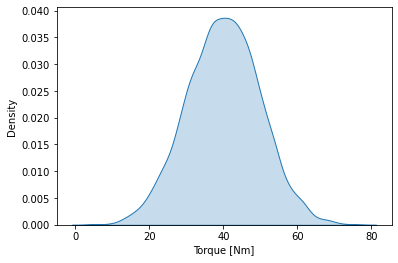

In [44]:
sns.kdeplot(data=df['Torque [Nm]'], label='Torque [Nm]', shade=True)


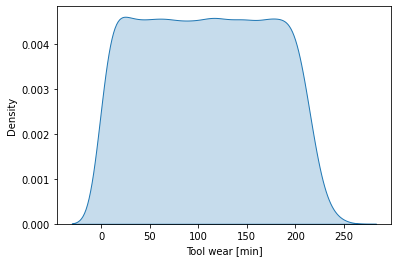

In [45]:
sns.kdeplot(data=df['Tool wear [min]'], label='Tool wear [min]', shade=True)


#### Create training and evaluation datasets


In [46]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [48]:
# the shapes of X_train,X_test,y_train,y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


In [49]:
print(X_train.shape)
print(y_train.shape)

(7000, 11)
(7000,)


In [50]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Machine failure, dtype: int64

In [51]:
# correct
#done
#train dataset
train_d = pd.DataFrame(X_train)
train_d['y_train'] = y_train
print(train_d.shape)
print(train_d.shape)

#test dataset
test_d = pd.DataFrame(X_test)
test_d['y_test'] = y_test
print(test_d.shape)
print(test_d.shape)

(7000, 12)
(7000, 12)
(3000, 12)
(3000, 12)


In [52]:
train_d.head()

Type  Air temperature [K]  Process temperature [K]  ...  OSF  RNF  y_train
9069   2.0                297.2                    308.2  ...    0    0        0
2603   2.0                299.3                    309.2  ...    0    0        0
7738   2.0                300.5                    312.0  ...    0    0        0
1579   1.0                298.3                    308.3  ...    0    0        0
5058   1.0                303.9                    312.9  ...    0    0        0

[5 rows x 12 columns]

In [53]:
test_d.head()

Type  Air temperature [K]  Process temperature [K]  ...  OSF  RNF  y_test
6252   1.0                300.8                    310.3  ...    0    0       0
4684   2.0                303.6                    311.8  ...    0    0       1
1731   2.0                298.3                    307.9  ...    0    0       0
4742   1.0                303.3                    311.3  ...    0    0       0
4521   1.0                302.4                    310.4  ...    0    0       0

[5 rows x 12 columns]

#### Compile, train, and evaluate the model


In [54]:
# from here will write in the form of functions


#### Create model inputs


#### Experiment 1: standard neural network


In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers

classifier = Sequential()
classifier.add(Dense(units = 5, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 3, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, epochs=50)
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)



Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 7.3479 - accuracy: 0.8310
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.9649
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.9649
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.9649
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.9649
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.9649
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.9649
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9649
Epoch 9/50
219/219 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9649
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9649


train accuracy: 0.9649, loss: 0.1522 after 50 epochs
test accuracy: 0.9690, loss: 0.1385

In [56]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [57]:
# checking the probabilities
probability_model = Sequential([classifier, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

array([1.], dtype=float32)

In [58]:
np.argmax(predictions[0])

0

In [59]:
y_test[0]

0

In [60]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [61]:
y_test.nunique

<bound method IndexOpsMixin.nunique of 6252    0
4684    1
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Machine failure, Length: 3000, dtype: int64>

#### Experiment 2: Bayesian neural network (BNN)


##### dependencies and prerequisites

In [62]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

##### define priors and other functions


In [63]:
# to build the bnn

##### define bnn functions and class

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers
'''
classifier = Sequential()
classifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, epochs=100)
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

'''

"\nclassifier = Sequential()\nclassifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this\nclassifier.add(Dense(units = 4, activation = 'relu'))\nclassifier.add(Dense(units = 1, activation = 'sigmoid'))\nclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\nclassifier.fit(X_train, y_train, epochs=100)\ntest_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)\nprint('\nTest accuracy:', test_acc)\n\n"

target is machine failure variable

In [65]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [66]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(16, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(3, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.001
model_tfp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [67]:
model_tfp.fit(X_train, y_train, epochs=50)
test_loss, test_acc = model_tfp.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/50
219/219 [==============================] - 2s 2ms/step - loss: 0.7325 - accuracy: 0.1427
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.0171
Epoch 3/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.0069
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5212 - accuracy: 0.0034
Epoch 5/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.6636
Epoch 6/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.6729
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.3919
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.2486
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.4834
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.1660

Test accuracy: 0.968666672706604 after 50 epochs and test loss: 0.450

In [68]:
model_tfp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout (DenseFlipout  (None, 16)               368       
 )                                                               
                                                                 
 dense_flipout_1 (DenseFlipo  (None, 6)                198       
 ut)                                                             
                                                                 
 dense_flipout_2 (DenseFlipo  (None, 3)                39        
 ut)                                                             
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


define tensorboard variables for we plots

##### Train BNN with a small training subset.


##### Train BNN with the whole training set.


#### Experiment 3: probabilistic Bayesian neural network


w and b site
streamlit for gui

### WEEKLY OUTPUT PDFS

#### convert notebook to pdf 
for weekly progrss submission


In [69]:
%cd /content/drive/MyDrive/Colab Notebooks/MTP
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MTP
/content/drive/MyDrive/Colab Notebooks/MTP
 3rd_sem1.pdf   material		       READ.md	  'web app'
 3rd_sem.pdf    MTP_BNN.ipynb		       README.md
 datasets       MTP_BNN.pdf		       w1.pdf
 dec.pdf        MTP_Data_Visualization.ipynb   w2.pdf


In [70]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [71]:
!jupyter nbconvert --to pdf --output "3rd_sem1" MTP_BNN.ipynb

[NbConvertApp] Converting notebook MTP_BNN.ipynb to pdf
[NbConvertApp] Support files will be in 3rd_sem1_files/
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbConvertApp] Making directory ./3rd_sem1_files
[NbCon